<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0806/AI_hub_data_%EB%9D%BC%EB%B2%A8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import shutil
import json
import glob
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile

### 라벨 데이터 불러오기(K-fashion)

In [2]:
!gdown 1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji

Downloading...
From: https://drive.google.com/uc?id=1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji
To: /content/라벨링데이터.zip
100% 138M/138M [00:02<00:00, 65.6MB/s]


In [3]:
import os
os.mkdir('/content/vaild/')

In [4]:
%cd /content/vaild/

/content/vaild


In [ ]:
# !unzip '*.zip'
!unzip '/content/라벨링데이터.zip'

#### y라벨 생성

In [6]:
# 라벨 사전 만들기

name =['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'shoes', 'skirt', 'top_black', 'top_others', 'top_white']

name_dic ={}
for idx, value in enumerate(name):
    name_dic[value] = idx
name_dic

{'dress': 0,
 'outer': 1,
 'pants_black': 2,
 'pants_jeans': 3,
 'pants_others': 4,
 'pants_white': 5,
 'shoes': 6,
 'skirt': 7,
 'top_black': 8,
 'top_others': 9,
 'top_white': 10}

### 하드코딩(라벨별 데이터 폴더로 저장)

#### 이미지 데이터 불러오기

In [7]:
%cd /content

/content


In [8]:
# 스트리트 데이터 추가
!gdown 1Z0rcTJkhIfEs2iEC5oWvQS1RxLXipDQa

Downloading...
From: https://drive.google.com/uc?id=1Z0rcTJkhIfEs2iEC5oWvQS1RxLXipDQa
To: /content/스트리트.zip
100% 3.49G/3.49G [00:38<00:00, 90.9MB/s]


In [ ]:
!unzip /content/스트리트.zip

#### 파일 만들기

In [11]:
path = '/content/test'
os.mkdir(path)
os.mkdir('/content/data')

In [ ]:
folder_pahtes = '/content/vaild/소피스트케이티드' # json 파일 폴더
save_folder = '/content/data'
img_txt_folder = path
label_path = {} # 라벨별 txt 파일 이름

data_json = {} # 데이터 개수 확인용 딕셔너리

color_dic = {'화이트':'white', '블랙': 'black'} # 화이트/ 블랙 확인용
key_dic = {'아우터':'outer', '원피스':'dress'} # 키 변경용

for pathes in os.listdir(folder_pahtes):
    json_path = f'{folder_pahtes}/{pathes}'
    filename = pathes.split('.')[0]

    with open(json_path, 'r', encoding = 'utf-8') as file: # json 열기
        data = json.load(file)

        image_width = data['이미지 정보']['이미지 너비']
        image_height = data['이미지 정보']['이미지 높이']

        bbox = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 라벨링(소재/색상)

        for key, values in labeling.items():

            if '카테고리' in values[0] and '색상' in values[0]:
                # with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:
                with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:

                    # bbox 좌표 생성
                    try:
                        xmin, ymin, w, h = list(bbox[key][0].values()) # bbox 좌표 리스트

                        x_relative = (xmin + w / 2) / image_width
                        y_relative = (ymin + h / 2) / image_height

                        width_relative = w / image_width
                        height_relative = h / image_height
                    except:
                        continue

                    # 라벨 생성
                    color = labeling[key][0]['색상'] # 색상 저장 변수

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif labeling[key][0]['카테고리'] == '스커트':
                            label = f'skirt'

                        else:
                            label = f'pants_{color_dic.get(color, "others")}'

                    elif key == '상의':
                        label = f'top_{color_dic.get(color, "others")}'

                    else:
                        label = key_dic.get(key, key) # 영문으로 변환

                        # 데이터 개수 확인용
                    if label not in data_json:
                        data_json[label] = 1
                    else:
                        data_json[label] += 1

                    # 라벨별 txt 파일 이름 저장
                    if label not in label_path:
                        label_path[label] = []
                        label_path[label].append(f'{pathes[:-5]}.txt')
                    else:
                        label_path[label].append(f'{pathes[:-5]}.txt')

                    label_num = name_dic.get(label, value) # 정수로 변환

                    f.write(f'{label_num} {x_relative} {y_relative} {width_relative} {height_relative}\n')
                f.close()

import shutil

# 라벨별로 데이터를 저장합니다
labelname = ['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'skirt', 'top_black', 'top_others', 'top_white']
image_folder = '/content/001'

for n in labelname:
    save_folder_path = f'{save_folder}/{n}'

    # 목적지 폴더가 존재하지 않으면 생성합니다
    if not os.path.exists(save_folder_path):
        os.makedirs(save_folder_path)

    for i in label_path[n][:150]: # label_path[n][:개수] 적으면 지정한 개수만큼 데이터가 저장됩니다
        # txt 파일 경로
        txt_path = f'{path}/{i}'

        # 이미지 파일 경로
        image_path = f'{image_folder}/{i[:-4]}.jpg'

        try:
            # txt 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(txt_path))):
                # txt 파일을 목적지 폴더로 복사합니다
                shutil.copy(txt_path, save_folder_path)
            # 이미지 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(image_path))):
                # 이미지 파일을 목적지 폴더로 복사합니다
                shutil.copy(image_path, save_folder_path)
        except Exception as e:
            print(f"파일 복사 중 오류 발생: {e}")
            continue

In [13]:
# 이미지/텍스트 파일 한 폴더로 저장하기- 이미 label_path와 폴더에 txt 파일이 저장되어 있는 경우
import shutil

# 라벨별로 데이터를 저장합니다
labelname = ['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'skirt', 'top_black', 'top_others', 'top_white']
image_folder = '/content/소피스트케이티드'

for n in labelname:
    save_folder_path = f'{save_folder}/{n}'

    # 목적지 폴더가 존재하지 않으면 생성합니다
    if not os.path.exists(save_folder_path):
        os.makedirs(save_folder_path)

    for i in label_path[n]:
        # txt 파일 경로
        txt_path = f'{path}/{i}'

        # 이미지 파일 경로
        image_path = f'{image_folder}/{i[:-4]}.jpg'

        try:
            # txt 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(txt_path))):
                # txt 파일을 목적지 폴더로 복사합니다
                shutil.copy(txt_path, save_folder_path)
            # 이미지 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(image_path))):
                # 이미지 파일을 목적지 폴더로 복사합니다
                shutil.copy(image_path, save_folder_path)
        except Exception as e:
            print(f"파일 복사 중 오류 발생: {e}")
            continue

In [ ]:
len(os.listdir('/content/data/outer'))

300

In [ ]:
# 각 키에 해당하는 값의 개수를 저장할 빈 딕셔너리를 생성합니다
value_counts = {}

# 딕셔너리의 각 키와 값을 순회합니다
for key, value in label_path.items():
    # 현재 키에 해당하는 값의 개수를 value_counts 딕셔너리에 저장합니다
    value_counts[key] = len(value)

print(value_counts)

{'top_others': 22422, 'outer': 8396, 'pants_jeans': 15149, 'dress': 3860, 'skirt': 4452, 'top_white': 11382, 'pants_white': 3317, 'top_black': 3412, 'pants_black': 3706, 'pants_others': 5131}


{'top_others': 22422,
 'outer': 8396,
 'pants_jeans': 15149,
 'dress': 3860,
 'skirt': 4452,
 'top_white': 11382,
 'pants_white': 3317,
 'top_black': 3412,
 'pants_black': 3706,
 'pants_others': 5131}

##### 모든 폴더

In [ ]:
folder_pathes = '/content/vaild' # json 파일 들어있는 가장 상위 폴더
file_pathes = [] # 해당하는 json file 경로 저장

for pathes in os.listdir(folder_pathes): # 폴더
    for path in os.listdir(f'{folder_pathes}/{pathes}'): # json 파일
        json_pathes = f'{folder_pathes}/{pathes}/{path}' # json 파일 경로 (/content/vaild/섹시/854405.json)
        text_path = f'/content/texts/{path[:-4]}txt' # txt 파일 경로(/content/text/323470.txt)

        # json에서 필요한 정보 가져오기
        with open(json_pathes, 'r', encoding='utf-8') as file: # 제이슨 파일 열기
            data = json.load(file)
            image_size = data['이미지 정보'] # image 정보 관련
            image_width = image_size['이미지 너비']
            image_height = image_size['이미지 높이']
            dataset = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox 관련
            poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤 관련
            labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 소재/색상 관련

            # label용 txt 만들기

            for key, values in labeling.items():
                if '카테고리' in values[0] and '색상' in values[0]:
                    with open(f'{text_path}', 'a')as f:
                        coordinates = list(dataset[key][0].values())
                        try:
                            xmin, ymin, w, h = coordinates

                            x_center = xmin + w / 2
                            y_center = ymin + h / 2

                            x_relative = x_center / image_width
                            y_relative = y_center / image_height

                            width_relative = w / image_width
                            height_relative = h / image_height
                        except:
                            continue
                        color = labeling[key][0]['색상']
                        color_dic = {'화이트':'white', '블랙': 'black'}
                        key_dic = {'아우터':'outer', '원피스':'dress'}

                        if key == '하의':
                            if '청바지' in labeling[key][0]['카테고리']:
                                label = f'pants_jeans'

                            if '스커트' in labeling[key][0]['카테고리']:
                                label = f'skirt'

                            elif color in color_dic:
                                color = color_dic[color]
                                label = f'pants_{color}'

                            else:
                                label = f'pants_others'


                        elif key == '상의':
                            key = 'top'
                            if color in color_dic:
                                color = color_dic[color]
                                label = f'{key}_{color}'
                            else:
                                label = f'{key}_others'

                        if key in key_dic:
                            label = key_dic[key]

                        if label in name_dic:
                            label = name_dic[label]

                        f.write(f'{label} {x_relative} {y_relative} {width_relative} {height_relative}'+'\n')
                    f.close()

In [ ]:
olp  = os.listdir('/content/text')
len(olp)

117488

##### 폴더 1개로 test

In [ ]:
os.mkdir('/content/data')

In [ ]:
folder_pahtes = '/content/vaild/스트리트' # json 파일 폴더
data_json = {} # 데이터 개수 확인용 딕셔너리

color_dic = {'화이트':'white', '블랙': 'black'} # 화이트/ 블랙 확인용
key_dic = {'아우터':'outer', '원피스':'dress'} # 키 변경용

for pathes in os.listdir(folder_pahtes)[22000:27000]:
    json_path = f'{folder_pahtes}/{pathes}'

    with open(json_path, 'r', encoding = 'utf-8') as file: # json 열기
        data = json.load(file)

        image_width = data['이미지 정보']['이미지 너비']
        image_height = data['이미지 정보']['이미지 높이']

        bbox = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 라벨링(소재/색상)

        for key, values in labeling.items():
            if '카테고리' in values[0] and '색상' in values[0]:
                with open(f'/content/data/{pathes[:-5]}.txt', 'a') as f:

                    # bbox 좌표 생성
                    try:
                        xmin, ymin, w, h = list(bbox[key][0].values()) # bbox 좌표 리스트

                        x_relative = (xmin + w / 2) / image_width
                        y_relative = (ymin + h / 2) / image_height

                        width_relative = w / image_width
                        height_relative = h / image_height
                    except:
                        continue


                    # 라벨 생성
                    color = labeling[key][0]['색상'] # 색상 저장 변수

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif labeling[key][0]['카테고리'] == '스커트':
                            label = f'skirt'

                        else:
                            label = f'pants_{color_dic.get(color, "others")}'

                    elif key == '상의':
                        label = f'top_{color_dic.get(color, "others")}'

                    else:
                        label = key_dic.get(key, key) # 영문으로 변환


                        # 데이터 개수 확인용
                    if label not in data_json:
                        data_json[label] = 1
                    else:
                        data_json[label] += 1

                    label = name_dic.get(key, key) # 정수로 변환

                    f.write(f'{label} {x_relative} {y_relative} {width_relative} {height_relative}\n')
                f.close()

In [ ]:
data_json

{'pants_jeans': 1311,
 'top_white': 1016,
 'top_others': 1948,
 'outer': 771,
 'pants_white': 310,
 'dress': 332,
 'pants_others': 459,
 'top_black': 323,
 'skirt': 374,
 'pants_black': 330}

In [ ]:
data_num = os.listdir('/content/data')
len(data_num)

9748

##### 파일 1개로 test

In [ ]:
with open("/content/vaild/스포티/1330776.json", 'r', encoding='utf-8') as file: # 제이슨 파일 열기
    data = json.load(file)
    image_size = data['이미지 정보'] # image 정보 관련
    image_width = image_size['이미지 너비']
    image_height = image_size['이미지 높이']
    dataset = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox 관련
    poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤 관련
    labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 소재/색상 관련

    for key, values in labeling.items():
        if '카테고리' in values[0] and '색상' in values[0]:

            with open(f'/content/1344413.txt', 'a')as f:
                coordinates = list(dataset[key][0].values())
                xmin, ymin, w, h = coordinates

                x_center = xmin + w / 2
                y_center = ymin + h / 2

                x_relative = x_center / image_width
                y_relative = y_center / image_height

                width_relative = w / image_width
                height_relative = h / image_height

                color = labeling[key][0]['색상']
                color_dic = {'화이트':'white', '블랙': 'black'}
                key_dic = {'아우터':'outer', '원피스':'dress'}

                if key == '하의':
                    if labeling[key][0]['카테고리'] == '청바지':
                        label = f'pants_jeans'

                    elif '스커트' in labeling[key][0]['카테고리']:
                        label = f'skirt'

                    elif color in color_dic:
                        color = color_dic[color]
                        label = f'pants_{color}'

                    else:
                        label = f'pants_others'

                elif key == '상의':
                    key = 'top'
                    if color in color_dic:
                        color = color_dic[color]
                        label = f'{key}_{color}'
                    else:
                        label = f'{key}_others'
                if key in key_dic:
                    label = key_dic[key]

                f.write(f'{label} {x_relative} {y_relative} {width_relative} {height_relative}'+'\n')
            f.close()


In [ ]:
folder_pathes = '/content/vaild/클래식' # json 파일 들어있는 가장 상위 폴더
file_pathes = [] # 해당하는 json file 경로 저장

for pathes in os.listdir(folder_pathes): # 폴더
    json_pathes = f'{folder_pathes}/{pathes}'

    with open(json_pathes, 'r', encoding='utf-8') as file: # 제이슨 파일 열기
        data = json.load(file)
        image_size = data['이미지 정보'] # image 정보 관련
        image_width = image_size['이미지 너비']
        image_height = image_size['이미지 높이']
        dataset = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox 관련
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤 관련
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 소재/색상 관련

        for key, values in labeling.items():
            if '카테고리' in values[0] and '색상' in values[0]:
                with open(f'/content/test/{pathes[:-5]}.txt', 'a')as f:
                    segmentations = convert_to_segmentation(poly, image_width, image_height)
                    seg = ' '.join(map(str, segmentations))

                    color = labeling[key][0]['색상']
                    color_dic = {'화이트':'white', '블랙': 'black'}
                    key_dic = {'아우터':'outer', '원피스':'dress'}

                    if key == '하의':
                        if '청바지' in labeling[key][0]['카테고리']:
                            label = f'pants_jeans'

                        if '스커트' in labeling[key][0]['카테고리']:
                            label = f'skirt'

                        elif color in color_dic:
                            color = color_dic[color]
                            label = f'pants_{color}'

                        else:
                            label = f'pants_others'


                    elif key == '상의':
                        key = 'top'
                        if color in color_dic:
                            color = color_dic[color]
                            label = f'{key}_{color}'
                        else:
                            label = f'{key}_others'

                    if key in key_dic:
                        label = key_dic[key]

                    if label in name_dic:
                        label = name_dic[label]

                    file_pathes.append(json_pathes)
                    # print(f'{label} {x_relative} {y_relative} {width_relative} {height_relative}'+'\n')
                    f.write(f'{label} {seg}'+'\n')
                f.close()

NameError: ignored

#### 폴리곤 좌표로 bbox 찾기

##### 폴리곤 y 데이터

In [ ]:
# 폴리곤 좌표
def convert_to_segmentation(poly, image_width, image_height):
    segmentation = []
    for key, value in poly.items():
        # if isinstance(value, list) and value: # isinstance: 형태가 일치하는지 여부(T/F)
        if len(value[0]) > 1:
            for sub_dict in value:
                test = []
                for i in range(1,int(len(sub_dict)//2) +1):
                    x_key = sub_dict[f'X좌표{i}'] / image_width
                    y_key = sub_dict[f'Y좌표{i}'] / image_height
                    x_value = x_key
                    y_value = y_key
                    test.extend([x_value, y_value]) # extend: 가장 바깥쪽 iterable의 모든 항목 추가
                segmentation.append(test)
    return segmentation

In [ ]:
os.mkdir('/content/ect')

In [ ]:
folder_pathes = '/content/vaild/스트리트' # json 파일 들어있는 가장 상위 폴더
file_pathes = [] # 해당하는 json file 경로 저장

for pathes in os.listdir(folder_pathes): # 폴더
    json_pathes = f'{folder_pathes}/{pathes}'

    with open(json_pathes, 'r', encoding='utf-8') as file: # 제이슨 파일 열기
        data = json.load(file)
        image_size = data['이미지 정보'] # image 정보 관련
        image_width = image_size['이미지 너비']
        image_height = image_size['이미지 높이']
        dataset = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox 관련
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤 관련
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 소재/색상 관련

        for key, values in labeling.items():
            if '카테고리' in values[0] and '색상' in values[0]:
                with open(f'/content/ect/{pathes[:-5]}.txt', 'a')as f:
                    segmentations = convert_to_segmentation(poly, image_width, image_height)

                    # seg = ' '.join(map(str, segmentations[0])) index 오류
                    seg = ' '.join(map(str, sum(segmentations, [])))

                    color = labeling[key][0]['색상']
                    color_dic = {'화이트':'white', '블랙': 'black'}
                    key_dic = {'아우터':'outer', '원피스':'dress'}

                    if key == '하의':
                        if '청바지' in labeling[key][0]['카테고리']:
                            label = f'pants_jeans'

                        if '스커트' in labeling[key][0]['카테고리']:
                            label = f'skirt'

                        elif color in color_dic:
                            color = color_dic[color]
                            label = f'pants_{color}'

                        else:
                            label = f'pants_others'


                    elif key == '상의':
                        key = 'top'
                        if color in color_dic:
                            color = color_dic[color]
                            label = f'{key}_{color}'
                        else:
                            label = f'{key}_others'

                    if key in key_dic:
                        label = key_dic[key]

                    if label in name_dic:
                        label = name_dic[label]

                    file_pathes.append(json_pathes)

                    f.write(f'{label} {seg}'+'\n')
                f.close()

In [ ]:
x,y =[] , []
result = {}
for key, value in poly.items():
    if len(value[0])>1:

        result[key]=[]
        for sub_dict in value:

            for i in range(1,int(len(sub_dict)//2) +1):
                x_value = sub_dict[f'X좌표{i}']
                y_value = sub_dict[f'Y좌표{i}']
                x.append(x_value)
                y.append(y_value)

            xmin, ymin, xmax, ymax = min(x), min(y), max(x), max(y)
            xmin, ymin, xmax, ymax = min(x), min(y), max(x), max(y)
            x_center = (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2

            x_relative = round(x_center / image_width, 4)
            y_relative = round(y_center / image_height, 4)

            width_relative = round((xmax - xmin) / image_width, 4)
            height_relative = round((ymax - ymin) / image_height,4)
            x,y =[] , []

        result[key]=[x_center, y_center, width_relative, height_relative]
result

{'아우터': [377.0, 274.44755000000004, 0.445, 0.4947],
 '하의': [378.5, 638.778, 0.3438, 0.5804]}

In [ ]:
a =  {'하의': [{'X좌표8': 341.0,
   'X좌표9': 355.0,
   'X좌표2': 267.0,
   'X좌표3': 256.0,
   'X좌표1': 278.0,
   'X좌표6': 298.0,
   'X좌표7': 325.0,
   'X좌표4': 241.0,
   'X좌표5': 254.0,
   'Y좌표25': 430.318,
   'Y좌표9': 661.274,
   'Y좌표22': 353.333,
   'Y좌표21': 431.318,
   'Y좌표24': 466.311,
   'Y좌표23': 334.336,
   'Y좌표20': 412.321,
   'X좌표19': 516.0,
   'X좌표18': 505.0,
   'X좌표17': 480.0,
   'X좌표16': 440.0,
   'X좌표15': 392.0,
   'X좌표14': 368.0,
   'X좌표13': 366.0,
   'X좌표12': 369.0,
   'X좌표11': 380.0,
   'Y좌표4': 879.232,
   'X좌표10': 382.0,
   'Y좌표3': 776.252,
   'Y좌표2': 600.286,
   'Y좌표1': 423.319,
   'Y좌표8': 767.254,
   'Y좌표7': 934.222,
   'Y좌표6': 936.221,
   'Y좌표5': 943.22,
   'Y좌표15': 900.228,
   'Y좌표14': 870.234,
   'Y좌표17': 660.274,
   'Y좌표16': 875.233,
   'Y좌표11': 612.283,
   'Y좌표10': 523.3,
   'Y좌표13': 808.246,
   'Y좌표12': 731.261,
   'X좌표25': 267.0,
   'X좌표24': 320.0,
   'X좌표23': 364.0,
   'X좌표22': 444.0,
   'X좌표21': 472.0,
   'X좌표20': 511.0,
   'Y좌표19': 441.316,
   'Y좌표18': 551.295}]}


x  = []
y = []
for i in a['하의'][0]:
    if  'X' in i:
        x.append(a['하의'][0][i])
    else:
        y.append(a['하의'][0][i])
x = sorted(x)
y = sorted(y)

In [ ]:
min(x), min(y),  max(x), max(y)
# 198.5 /14.4971/ 356 /518

(241.0, 334.336, 516.0, 943.22)

##### 바인딩 박스

In [ ]:
path_str= '/content/vaild/모던/1000456.json'

with open(f'{path_str}', 'r') as f:
    json_object = json.load(f)
# with open(f'{path_str[:-4]}.text', 'w', encoding='utf-8') as a:
    print(json_object['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['하의'])
    p_list = json_object['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['하의']
    print(p_list[0].values())


In [ ]:
def data_prosess(path_str, original_size=(1024,1024), image_width=416, image_height=416):
    if path_str == 'train':
        original_folder = 'G:/TEst/Jupypy/train/images/'
        output_folder = 'G:/TEst/Jupypy/train/resized_images/'
        createDirectory(output_folder)

    elif path_str == 'valid':
        original_folder = 'G:/TEst/Jupypy/valid/images/'
        output_folder = 'G:/TEst/Jupypy/valid/resized_images/'
        createDirectory(output_folder)

    elif path_str == 'test':
        original_folder = 'G:/TEst/Jupypy/test/images/'
        output_folder = 'G:/TEst/Jupypy/test/resized_images/'
        createDirectory(output_folder)
    file_list = []
    files = os.listdir(original_folder)
    for fname in files:
        if '.json' in fname:
            file_list.append(fname)

    for fname in file_list:
        with open(f'{original_folder}{fname}', 'r') as f:
           json_object = json.load(f)
        with open(f'{output_folder}resize_{fname[:-4]}txt', 'w', encoding='UTF-8') as f:
            for feature in json_object['features']:
                json_label = feature['properties']['type_id']
                label_data = str(int(feature['properties']['type_id']) -1 )
                label_imcoords = feature['properties']['building_imcoords'].split(',')
                aa = feature['properties']['image_id']
                try:
                    polygon_coords = [(float(label_imcoords[i]), float(label_imcoords[i + 1])) for i in range(0, len(label_imcoords), 2)]
                    original_polygon = resize_polygons(polygon_coords, original_size, new_size=(image_width, image_height))
                    yolov4_label = polygon_to_yolov4_label(original_polygon, image_width, image_height, label_data)
                    f.write(yolov4_label+'\n')
                    print(f'json label:{json_label}, label data:{label_data}')
                    print(f'1:{yolov4_label}')
                except:
                    print(f'2:{aa}')
                    continue

#### 색상 값이 있는 json 파일 경로 저장 / 색상값과 카테고리 별 데이터 수 확인

In [ ]:
jsons_paths = os.listdir('/content/jsons')
jsons = {}
save_paths = []
for paths in jsons_paths:
    with open(paths, 'r') as file:
        data = json.load(file)
        dataset = data['데이터셋 정보']['데이터셋 상세설명']['라벨링']
        for k, v in dataset.items():
            for i in v:
                if '색상' in i:
                    save_paths.append(paths)
                    if k not in json:
                        jsons[k] = {'수': 1, i['색상']: 1}
                    else:
                        if i['색상'] not in json[k]:
                            jsons[k][i['색상']] = 1
                        else:
                            jsons[k][i['색상']] += 1
                        jsons[k]['수'] += 1
jsons

In [ ]:
# 중복값 제거
save_pathes = list(set(save_paths))
save_pathes

##### 색상 정보가 있는 json 파일 따로 통합

In [ ]:
import shutil
import os
# 데이터 병합
# 폴더 생성
os.mkdir('/content/jsons', 0o777)
# 폴더 경로
merge_path = os.path.join('/content', 'jsons')

for paths in save_pathes:
    # 데이터 있는 폴더 경로
    shutil.move(paths, merge_path)

In [ ]:
len(save_pathes)

119857

In [ ]:
os.mkdir('/content/text')

In [ ]:
import pandas as pd

df = pd.DataFrame(jsons)
df.transpose()

,수,네온,화이트,베이지,핑크,민트,그레이,브라운,블랙,퍼플,...,라벤더,오렌지,실버,와인,카키,레드,그린,네이비,블루,골드
상의,72397,631,22771,7481,5516,1182,3005,2954,7290,1325,...,1323,1610,1182,1143,1532,2291,1489,2256,1791,641
아우터,20234,67,2415,4187,1102,197,2029,1609,3028,155,...,203,268,577,298,1228,268,269,788,504,98
하의,63525,121,10611,6551,1674,270,2868,1942,13136,228,...,387,200,935,426,1228,421,390,5067,9398,184
원피스,21804,91,2614,2531,1855,363,1403,1236,3747,446,...,439,336,450,551,694,721,595,1375,694,224


In [ ]:
d = df.sum(axis=1)
d

수        177960
네온          910
화이트       38411
베이지       20750
핑크        10147
민트         2012
그레이        9305
브라운        7741
블랙        27201
퍼플         2154
옐로우        3055
스카이블루     11800
라벤더        2352
오렌지        2414
실버         3144
와인         2418
카키         4682
레드         3701
그린         2743
네이비        9486
블루        12387
골드         1147
dtype: int64

#### 데이터 분포 파악

In [ ]:
def data_pose(path):
    jsons_paths = os.listdir(path)
    jsons = {}
    save_paths = []

    for paths in jsons_paths:

        with open(f'{path}/{paths}', 'r', encoding = 'utf-8') as file:
            data = json.load(file)
            labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링']

            for key, values in labeling.items():
                if '카테고리' in values[0] and '색상' in values[0]:

                    save_paths.append(paths) # 제이슨 경로 저장
                    color = labeling[key][0]['색상']
                    color_dic = {'화이트':'white', '블랙': 'black'}
                    key_dic = {'아우터':'outer', '원피스':'dress'}

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif '스커트' in labeling[key][0]['카테고리']:
                            label = f'skirt'

                        elif color in color_dic:
                            color = color_dic[color]
                            label = f'pants_{color}'

                        else:
                            label = f'pants_others'


                    elif key == '상의':
                        key = 'top'

                        if color in color_dic:
                            color = color_dic[color]
                            label = f'{key}_{color}'

                        else:
                            label = f'{key}_others'

                    # 아우터, 원피스가 있다면 영어로 변경
                    if key in key_dic:
                        label = key_dic[key]

                    if label not in jsons:
                        jsons[label] = 1
                    else:
                        jsons[label] += 1


                    # 라벨을 숫자로 변경
                    if label in name_dic:
                        label = name_dic[label]

    return jsons

In [ ]:
folder = os.listdir('/content/vaild')

In [ ]:
folder

['프레피',
 '젠더리스',
 '기타',
 '스포티',
 '힙합',
 '아방가르드',
 '리조트',
 '컨트리',
 '페미닌',
 '히피',
 '키치',
 '로맨틱',
 '레트로',
 '모던',
 '스트리트',
 '오리엔탈',
 '펑크',
 '밀리터리',
 '클래식',
 '섹시',
 '매니시',
 '소피스트케이티드',
 '톰보이',
 '웨스턴']

In [ ]:
path = '/content/vaild/모던'
classic =  data_pose(path)

In [ ]:
classic

{'skirt': 797,
 'top_others': 2856,
 'outer': 1887,
 'dress': 1757,
 'pants_black': 1583,
 'pants_others': 1188,
 'top_white': 1807,
 'top_black': 947,
 'pants_white': 712,
 'pants_jeans': 396}

In [ ]:
len(file_pathes)

1360

#### 이미지 / txt 겹치게 폴더로 저장


In [7]:
%cd /content

/content


In [8]:
!gdown 1eFBf_-o-alcvHGZKDJUrrO9cWcLxhofB #소피스트케이티드

Downloading...
From: https://drive.google.com/uc?id=1eFBf_-o-alcvHGZKDJUrrO9cWcLxhofB
To: /content/소피스트케이티드.zip
100% 207M/207M [00:05<00:00, 37.7MB/s]


In [9]:
!unzip /content/소피스트케이티드.zip

Archive:  /content/소피스트케이티드.zip
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1000986.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1000996.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1001376.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1001976.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1001996.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1002006.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007194.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007204.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007884.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007894.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007904.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007914.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007924.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007934.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1007944.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008714.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008724.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008734.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008744.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008754.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008884.jpg  
  inflating: ╝╥╟╟╜║╞о─╔└╠╞╝╡х/1008894.jpg  


In [ ]:
!gdown 1AEFb2Fh7-zZ0dGnuJFwE1TKsTxuAsqAc # 모던

Downloading...
From: https://drive.google.com/uc?id=1AEFb2Fh7-zZ0dGnuJFwE1TKsTxuAsqAc
To: /content/모던.zip
100% 577M/577M [00:04<00:00, 121MB/s] 


In [ ]:
!unzip /content/모던.zip

In [ ]:
import shutil
import os
# 폴더 생성
os.mkdir('/content/dataset', 0o777)

In [ ]:
dataset_pathes = os.listdir('/content/dataset')
print(f'{dataset_pathes[0][:-4]}.jpg')

1001836.jpg


In [ ]:
import shutil
# 데이터 병합(json)
# 폴더 경로
merge_path = os.path.join('/content', 'dataset')

for i in dataset_pathes:
    try:
        paths = f'/content/001/{i[:-4]}.jpg'
        shutil.move(paths, merge_path)
    # print(paths)
    except :
        pass


In [ ]:
#폴더 병합
for i in os.listdir('/content/wt'):
    path = f'/content/wt/{i}'
    try:
        shutil.move(path, '/content/wp')
    except:
        continue

In [ ]:
len(os.listdir('/content/test'))

6966

#### zip 파일 만들기

In [ ]:
%cd /content
import os
from zipfile import ZipFile
# 압축할 폴더 경로
folder_path = '/content/data'
# 압축 파일명
zip_filename = f'{folder_path[9:]}.zip'
def zip_folder(folder_path, zip_filename):
    # 폴더 안의 파일들 가져오기
    file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    # 압축 파일 생성
    with ZipFile(zip_filename, 'w') as zipf:
        for file in file_list:
            file_path = os.path.join(folder_path, file)
            zipf.write(file_path, os.path.basename(file_path))
    print(f"압축 완료: {zip_filename}")
# 함수 호출로 압축 진행
zip_folder(folder_path, zip_filename)

/content
압축 완료: data.zip


In [ ]:
import zipfile
import os

# 부모 폴더 경로 (zip 파일로 저장하려는 폴더)
parent_folder_path = '/content/data'

# Zip 파일 경로 (zip 파일을 저장할 위치와 파일명)
zip_file_path = '/content/data.zip'

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# 함수를 호출하여 zip 파일을 생성합니다
zip_folder(parent_folder_path, zip_file_path)

### 데이터 불러오기 (패션상품 및 착용 영상)

#### 데이터 가져오기

In [ ]:
%cd /content

In [ ]:
!gdown 1qiHtbkcOzmxBetB3ylTrPcgJsBXlqc1U

Downloading...
From: https://drive.google.com/uc?id=1qiHtbkcOzmxBetB3ylTrPcgJsBXlqc1U
To: /content/vaild/New_sample.zip
100% 504M/504M [00:11<00:00, 43.5MB/s]


In [ ]:
!unzip /content/New_sample.zip

#### json 코드 확인

In [ ]:
# json 파일 경로 확인
file_name = os.listdir('/content/라벨링데이터/Item-Parse_f')
test = folder_path[0]
file_path = f'/content/라벨링데이터/Item-Parse_f/{test}'
print(test, file_path)

1211144_F.json /content/라벨링데이터/Item-Parse_f/1211144_F.json


In [ ]:
%cat /content/라벨링데이터/Item-Parse_f/1211144_F.json # json 파일 구성 확인

In [ ]:
# json 파일 열기
with open(file_path, 'r', encoding = 'utf-8') as file:# 제이슨 파일 열기
    category = json.load(file)

# 원하는 데이터 변수로 저장

# category['image_size'] # image size
image_width = category['image_size']['width']
image_height = category['image_size']['height']
label = category['category_name'] # category name
segmentataion_1 = category['region1']['segmentation'] # region 당 segmentataion

#### segment 계산

In [ ]:
# segment 좌표 설정

def convert_to_yolo_format(segmentation, image_width, image_height):
    yolo_coords = []
    for points in segmentation:
        # yolo_points = []
        for x, y in points:
            x_norm = x / image_width
            y_norm = y / image_height
            # yolo_points.extend([x_norm, y_norm])
            yolo_coords.extend([x_norm, y_norm])
        # yolo_coords.append(yolo_points)
    return yolo_coords

In [ ]:
yolo_segmentation_region1 = convert_to_yolo_format(segmentataion_1, image_width, image_height)

#### txt 저장

In [ ]:
category_dic = {"hat":0,"coat":1,"tops":2, "bottoms":3,"shoes":4}

In [ ]:
#### txt 파일 저장

with open(f'/content/{test[:-5]}.txt', 'w') as f:
    if label in category_dic:
        label = category_dic[label]
    for i in range(1,len(category)):

        try:
            segmentataion =  category[f'region{i}']['segmentation']
            segmentation_region = convert_to_yolo_format(segmentataion, image_width, image_height)
            seg = ' '.join(map(str, segmentation_region))
        except:
            continue

        f.write(f'{label} {seg}'+ '\n')

## 장훈님 코드

In [ ]:
def find_color(data):
    labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})
    outer_color = labeling.get("아우터", [{}])[0].get("색상")
    if outer_color is not None:
        return outer_color
    return "Unknown"

In [12]:
os.mkdir('/content/test')
os.mkdir('/content/val')

In [ ]:
json_folder = "/content/vaild/스포티"
img_txt_folder = "/content/test"
outer_folder = "/content/val"
outer_data = []
outer_color_data = []
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        json_file_name = filename.split(".")[0]

        with open(os.path.join(json_folder, filename), "r", encoding="utf-8") as file:
            data = json.load(file)
            labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})

        # outer/ outer_color 둘 다 같은 결과 도출, 단, outer는 unknown이 더 많이 나옴
            outer_color = labeling.get("아우터", [{}])[0].get("색상")
            if outer_color is not None:
                outer_color_data.append(outer_color)
            outer_color_data.append("Unknown")

            # Unknown
            outer = labeling.get("아우터", [])
            # print(len(outer))
            # if len(outer) > 1:
            #     print(outer)
            for outer_item in outer:
                color = outer_item.get("색상")
                if color is not None:
                    outer_data.append(color)
                outer_data.append('Unknown')


            # color = find_color(data)
            # print(color)
            # # print(color)
            # new_folder = os.path.join(outer_folder, color)
            # if not os.path.exists(new_folder):
            #     os.makedirs(new_folder)
            # print(new_folder)
            # for file in os.listdir(img_txt_folder):
            #     if file.startswith(json_file_name):
            #         print(f"Moving {file} to {new_folder}")
            #         shutil.move(os.path.join(img_txt_folder, file), new_folder)

(2102, 2102)

In [ ]:
        with open(os.path.join(json_folder, filename), "r", encoding="utf-8") as file:
            data = json.load(file)
            labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})

        # outer/ outer_color 둘 다 같은 결과 도출, 단, outer는 unknown이 더 많이 나옴
            outer_color = labeling.get("아우터", [{}])[0].get("색상")
            if outer_color is not None:
                outer_color_data.append(outer_color)
            outer_color_data.append("Unknown")

            # Unknown
            outer = labeling.get("아우터", [])
            print(len(outer))
            if len(outer) > 1:
                print(outer)
            for outer_item in outer:
                color = outer_item.get("색상")
                if color is not None:
                    outer_data.append(color)
                outer_data.append('Unknown')

## cutmix

#### 모자이크

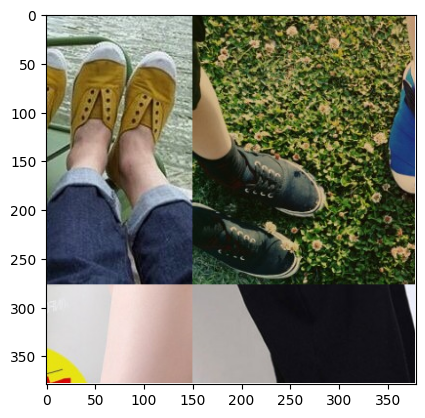

In [ ]:
# 모자이크
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def load_image(path, index):
    image = cv2.imread(os.path.join(path, image_list[index]), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0

    return image

def cutmix(path,index, imsize):
    w, h = imsize, imsize
    s = imsize // 2

    # 중앙값 랜덤하게 잡기
    xc, yc = [int(random.uniform(imsize*0.25, imsize*0.75)) for _ in range(2)] #256 ~ 768
    indexes = [index] + [random.randint(0, index) for _ in range(3)]

    #검은색 배경의 임의 이미지 생성 (여기다가 이미지들 붙여넣는 방식)
    result_img = np.full((imsize, imsize, 3), 1, dtype=np.float32)

    for i, index in enumerate(indexes):
        image = load_image(path, index)

        #top left
        if i == 0:
            x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
        elif i == 1:  # top right
            x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
            x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
        elif i == 2:  # bottom left
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
        elif i == 3:  # bottom right
            x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

        result_img[y1a:y2a, x1a:x2a] = image[y1b:y2b, x1b:x2b]

    return result_img


image_path = '/content/002'
index_len = len(os.listdir(image_path))
image_list = os.listdir(image_path)

image = load_image(image_path, 10)

image_size = image.shape[0]

test = cutmix(image_path, 10, image_size)
plt.imshow(test)
plt.show()

#### 컷믹스

### GPT

#### 이미지 좌표 랜덤하게 설정

In [34]:
import numpy as np
from PIL import Image

def cutmix(img1, img2, label1, label2, alpha=1.0):
    """
    두 이미지와 해당 레이블에 CutMix 증강을 적용합니다.

    매개변수:
        img1 (PIL 이미지): 첫 번째 이미지.
        img2 (PIL 이미지): 두 번째 이미지.
        label1 (int): 첫 번째 이미지의 레이블.
        label2 (int): 두 번째 이미지의 레이블.
        alpha (float): CutMix 강도를 제어하는 하이퍼파라미터.

    반환:
        mixed_img (PIL 이미지): 혼합된 이미지.
        mixed_label (int): 혼합된 레이블.
    """

    w, h = img1.size
    img2 = img2.resize((w, h))
    lam = np.random.beta(alpha, alpha)

    # 랜덤한 바운딩 박스 좌표 생성
    bbx1, bby1, bbx2, bby2 = rand_bbox(w, h, lam)

    # img2의 일부를 자르고 img1 위에 붙입니다.
    mixed_img = img1.copy()
    region = img2.crop((bbx1, bby1, bbx2, bby2))
    mixed_img.paste(region, (bbx1, bby1))

    # 혼합된 비율에 따라 레이블 조정
    mixed_label = lam * label1 + (1.0 - lam) * label2

    # 혼합된 이미지에 투명도 적용
    mixed_img.putalpha(int(alpha * 255))

    return mixed_img, mixed_label

In [35]:
import numpy as np
from PIL import Image

def rand_bbox(width, height, lam):
    """
    랜덤한 바운딩 박스 좌표를 생성합니다.

    매개변수:
        width (int): 이미지의 너비.
        height (int): 이미지의 높이.
        lam (float): 바운딩 박스 크기를 조절하는 하이퍼파라미터.

    반환:
        bbx1 (int): 바운딩 박스의 좌측 상단 x-좌표.
        bby1 (int): 바운딩 박스의 좌측 상단 y-좌표.
        bbx2 (int): 바운딩 박스의 우측 하단 x-좌표.
        bby2 (int): 바운딩 박스의 우측 하단 y-좌표.
    """
    # 패딩값 포함
    # cut_ratio = np.sqrt(1.0 - lam)
    # cut_w = int(width * cut_ratio)
    # cut_h = int(height * cut_ratio)

    # cx = np.random.randint(width)
    # cy = np.random.randint(height)

    # bbx1 = np.clip(cx - cut_w // 2, 0, width)
    # bby1 = np.clip(cy - cut_h // 2, 0, height)
    # bbx2 = np.clip(cx + cut_w // 2, 0, width)
    # bby2 = np.clip(cy + cut_h // 2, 0, height)

    # 패딩값 미포함

    cut_ratio = np.sqrt(1.0 - lam)
    cut_w = int(width * cut_ratio)
    cut_h = int(height * cut_ratio)

    cx = np.random.randint(cut_w // 2, width - cut_w // 2)
    cy = np.random.randint(cut_h // 2, height - cut_h // 2)

    bbx1 = cx - cut_w // 2
    bby1 = cy - cut_h // 2
    bbx2 = cx + cut_w // 2
    bby2 = cy + cut_h // 2

    return bbx1, bby1, bbx2, bby2

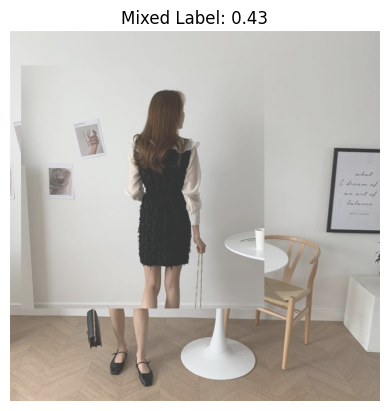

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

# 두 이미지에 해당하는 레이블 설정
label1 = 0
label2 = 1

# CutMix 증강 수행
mixed_img, mixed_label = cutmix(img1, img2, label1, label2, alpha=0.8)

# 이미지와 레이블 출력
plt.imshow(mixed_img)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()

#### 이미지 cut 좌표 bbox에서 설정

In [66]:
def cutmix(img1, img2, label1, label2, bbox_ratio_path, alpha=1.0):
    # PIL 이미지를 넘파이 배열로 변환합니다.
    img1 = np.array(img1)
    img2 = np.array(img2)

    # img2의 크기를 img1과 동일하게 조정합니다.
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # txt 파일에서 바운딩 박스 비율을 읽어옵니다.
    with open(bbox_ratio_path, 'r') as file:
        bbox_values = [float(value) for value in file.readline().strip().split(' ')]
        mixed_label = int(bbox_values[0])
        x_center_ratio, y_center_ratio, width_ratio, height_ratio = bbox_values[1:]

    # 바운딩 박스 비율을 이용하여 바운딩 박스 좌표를 계산합니다.
    w, h = img1.shape[1], img1.shape[0]
    bbx1, bby1, bbx2, bby2 = bbox_from_ratios(w, h, x_center_ratio, y_center_ratio, width_ratio, height_ratio)

    # img1과 img2를 혼합할 마스크를 생성합니다.
    mask = np.zeros_like(img1)
    mask[bby1:bby2, bbx1:bbx2, :] = 1

    # img2에 투명성을 적용합니다.
    blended_img = cv2.addWeighted(img1, alpha, img2, (1 - alpha), 0, dtype=cv2.CV_32F)

    # img2의 일부를 자르고 img1 위에 붙입니다.
    mixed_img = img1.copy()
    mixed_img[bby1:bby2, bbx1:bbx2, :] = blended_img[bby1:bby2, bbx1:bbx2, :]

    # 혼합된 비율에 따라 레이블 조정
    mixed_label = alpha * label1 + (1.0 - alpha) * label2

    # 넘파이 배열을 다시 PIL 이미지로 변환합니다.
    mixed_img = Image.fromarray(np.uint8(mixed_img))

    return mixed_img, mixed_label

def bbox_from_ratios(width, height, x_center_ratio, y_center_ratio, width_ratio, height_ratio):
    # 바운딩 박스 비율로부터 바운딩 박스 좌표를 계산합니다.
    x_center = int(x_center_ratio * width)
    y_center = int(y_center_ratio * height)
    w = int(width_ratio * width)
    h = int(height_ratio * height)

    bbx1 = max(0, x_center - w // 2)
    bby1 = max(0, y_center - h // 2)
    bbx2 = min(width, x_center + w // 2)
    bby2 = min(height, y_center + h // 2)

    return bbx1, bby1, bbx2, bby2

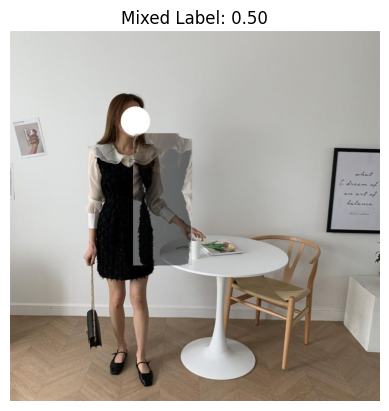

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

# 두 이미지에 해당하는 레이블 설정
label1 = 0
label2 = 1

# txt 파일 경로 설정
bbox_path = f'{img_path2[:-4]}.txt'

# CutMix 증강 수행
mixed_img, mixed_label = cutmix(img1, img2, label1, label2, bbox_path, alpha=0.5)

# 이미지와 레이블 출력
plt.imshow(mixed_img)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()

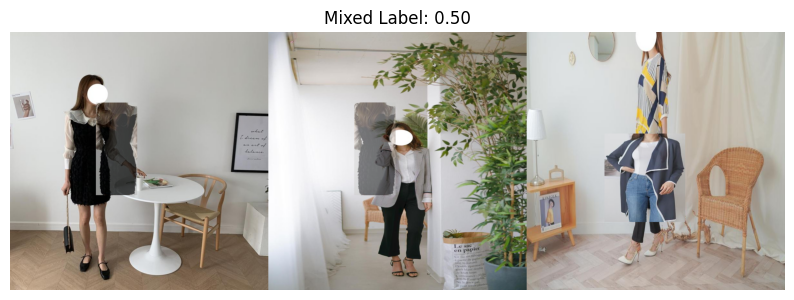

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

img_path3 = "/content/data/outer/1007194.jpg"
img_path4 = "/content/data/dress/1017589.jpg"

img_path5 = "/content/data/pants_black/1001376.jpg"
img_path6 = "/content/data/pants_jeans/1016846.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

img3 = Image.open(img_path3)
img4 = Image.open(img_path4)

img5 = Image.open(img_path5)
img6 = Image.open(img_path6)


# 두 이미지에 해당하는 레이블 설정
label1 = 0
label2 = 1

label3 = 0
label4 = 1

label5 = 0
label6 = 1

# txt 파일 경로 설정
bbox_path1 = f'{img_path2[:-4]}.txt'
bbox_path2 = f'{img_path4[:-4]}.txt'
bbox_path3 = f'{img_path6[:-4]}.txt'

# CutMix 증강 수행
mixed_img1, mixed_label1 = cutmix(img1, img2, label1, label2, bbox_path1, alpha=0.3)
mixed_img2, mixed_label2 = cutmix(img3, img4, label3, label4, bbox_path2, alpha=0.5)
mixed_img3, mixed_label3 = cutmix(img5, img6, label5, label6, bbox_path3, alpha=0.1)

## 이미지 출력
# 이미지 크기를 조정할 너비를 설정합니다.
width = 800

# mixed_img1의 너비와 높이 정보를 얻습니다.
img_width, img_height = mixed_img1.size

# mixed_img1의 너비에 맞게 높이를 조정합니다.
height = int(width * img_height / img_width)

# 이미지 크기를 조정합니다.
mixed_img1_resized = mixed_img1.resize((width, height))
mixed_img2_resized = mixed_img2.resize((width, height))
mixed_img3_resized = mixed_img3.resize((width, height))

# 세 개의 이미지를 가로로 합칩니다.
combined_image = np.hstack((mixed_img1_resized, mixed_img2_resized, mixed_img3_resized))

# 새로운 figure를 생성하고 크기를 설정합니다.
plt.figure(figsize=(10, 5))  # 10 inches wide and 5 inches high

# 그림과 라벨을 표시합니다.
plt.imshow(combined_image)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()

### 라벨 값 삭제